This notebook will be used to look at plots from the nowcast_green runs

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import glob

from salishsea_tools import viz_tools

#from nowcast import analyze

%matplotlib inline

Loading nowcast_green results

In [2]:
dmy = '08dec15'
filename = glob.glob('/results/SalishSea/nowcast-green/%s/SalishSea_1h_*_ptrc_T.nc' % dmy)
grid_g = nc.Dataset(filename[0])
thalweg = np.loadtxt('/data/dlatorne/MEOPAR/tools/bathymetry/thalweg_working.txt', dtype=int, unpack=True)
bio = nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
e3t = bio.variables['e3t_0']

Pre-load and set some variable

In [3]:
zlevels = grid_g.variables['deptht'][:]
x, z = np.meshgrid(np.arange(thalweg.shape[1]), zlevels)
time = -1

## Make surface and thalweg plots for all fields

In [4]:
def plot_surface_thalweg(grid_g, thalweg, zlevels, x, z, field, time):
    """ """
    
    conc = grid_g.variables[field]
    
    #Prepare surface values
    conc_ma = np.ma.masked_values(conc[time, 0, :, :], 0)
    vmin = np.min(conc_ma)
    vmax = np.max(conc_ma)
   
    #Prepare thalweg values
    npconc = conc[:]
    conc_t = npconc[time, :, thalweg[0], thalweg[1]]
    conc_t_ma = np.ma.masked_values(conc_t, 0)
    vmin_t = np.min(conc_t_ma)
    vmax_t = np.max(conc_t_ma)
    
    fig, (ax2, axcb, ax1) = plt.subplots(1, 3, figsize=(16, 8))
    land_colour = 'burlywood'
    for ax in (ax1, ax2):
        ax.set_axis_bgcolor(land_colour)
    ax2.set_position((0.125, 0.125, 0.5, 0.775))
    axcb.set_position((0.73, 0.125, 0.02, 0.775))
    ax1.set_position((0.8, 0.125, 0.2, 0.775))
    
    viz_tools.set_aspect(ax1)
    cmap = plt.get_cmap('Greens')
    cmap.set_bad('burlywood')
    
    #Surface plot
    mesh = ax1.pcolormesh(conc_ma, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(mesh)
    #plt.axis(0, conc_ma.shape[1], 0, conc_ma.shape[0])
    ax1.set_title('Surface {label}'.format(label=conc.long_name.title()), fontsize=16)
    ax1.set_xlabel('x Index')
    ax1.set_ylabel('y Index')
    cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
    
    #Thalweg
    mesh = ax2.pcolormesh(x, z, conc_t_ma.T, cmap=cmap, vmin=vmin_t, vmax=vmax_t)
    ax2.invert_yaxis()
    ax2.set_xlim(0, thalweg[0][-1])
    ax2.set_title('{label} along Thalweg'.format(label=conc.long_name.title()), fontsize=16)
    ax2.set_xlabel('x Index')
    ax2.set_ylabel('Depth (m)')
    return fig

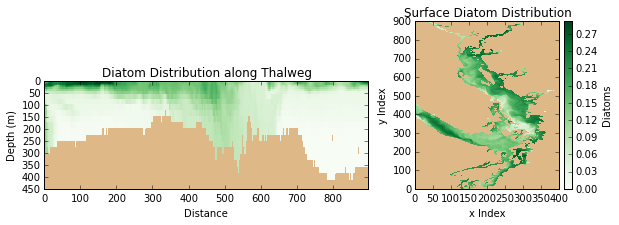

In [5]:
    field='PHY2'
    conc = grid_g.variables[field]
    
    #Prepare surface values
    conc_ma = np.ma.masked_values(conc[time, 0, :, :], 0)
    vmin = np.min(conc_ma)
    vmax = np.max(conc_ma)
   
    #Prepare thalweg values
    npconc = conc[:]
    conc_t = npconc[time, :, thalweg[0], thalweg[1]]
    conc_t_ma = np.ma.masked_values(conc_t, 0)
    vmin_t = np.min(conc_t_ma)
    vmax_t = np.max(conc_t_ma)
    
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 3))
    land_colour = 'burlywood'
    for ax in (ax1, ax2):
        ax.set_axis_bgcolor(land_colour)
        
    
    #viz_tools.set_aspect(ax1)
    cmap = plt.get_cmap('Greens')
    cmap.set_bad('burlywood')
    
    #Surface plot
    mesh = ax1.pcolormesh(conc_ma, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(mesh)
    #plt.axis(0, conc_ma.shape[1], 0, conc_ma.shape[0])
    ax1.set_title('Surface Diatom Distribution')
    ax1.set_xlabel('x Index')
    ax1.set_ylabel('y Index')
    cbar.set_label('Diatoms')
    
    #Thalweg
    mesh = ax2.pcolormesh(x, z, conc_t_ma.T, cmap=cmap, vmin=vmin_t, vmax=vmax_t)
    ax2.invert_yaxis()
    ax2.set_xlim(0, thalweg[0][-1])
    ax2.set_title('Diatom Distribution along Thalweg')
    ax2.set_xlabel('Distance')
    ax2.set_ylabel('Depth (m)')
    
    ax2.set_position((0.125, 0.125, 0.45, 0.5))
    #axcb.set_position((0.73, 0.125, 0.02, 0.775))
    ax1.set_position((0.64, 0.125, 0.2, 0.775))
    plt.savefig('testfig.png')

In [ ]:
# -17 good, -16 bad

/home/eolson/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:2200: RuntimeWarning: invalid value encountered in less_equal
  condition = umath.less_equal(mabs(xnew - value), atol + rtol * mabs(value))
/home/eolson/anaconda3/lib/python3.4/site-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


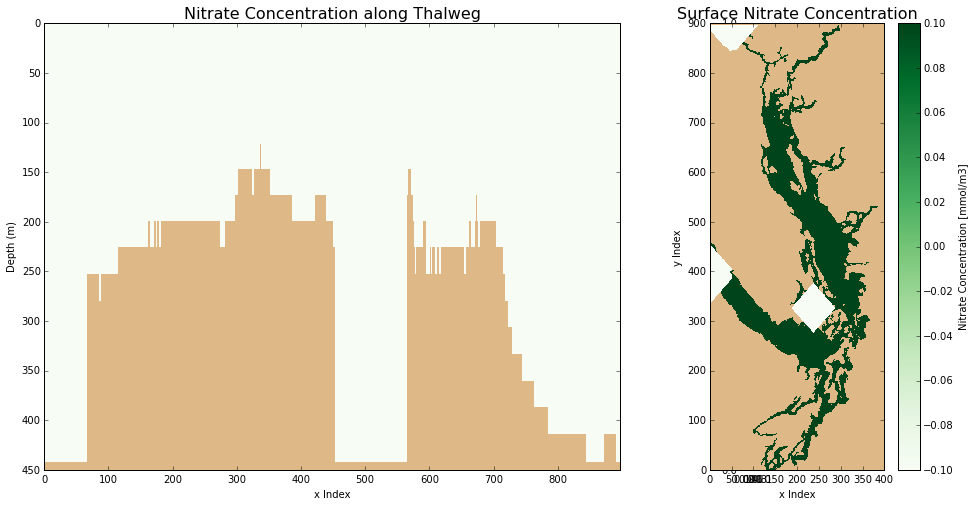

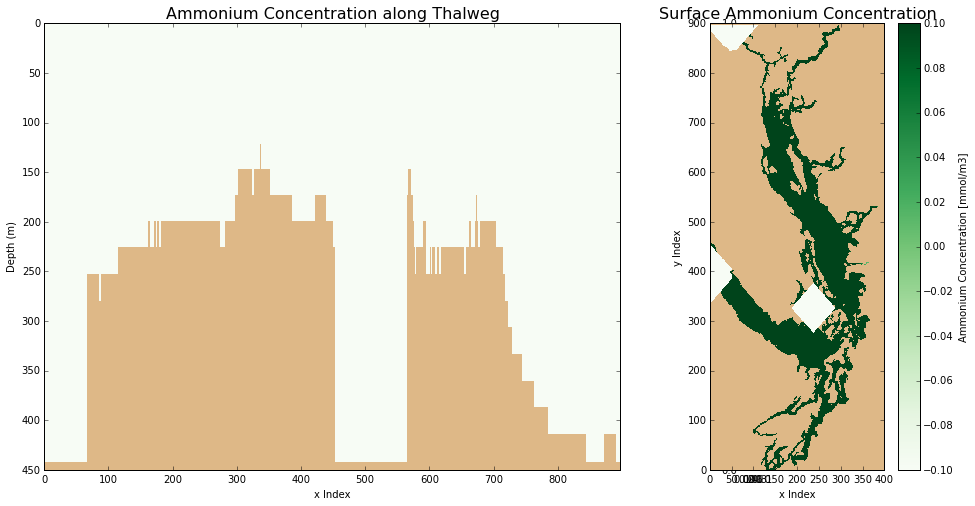

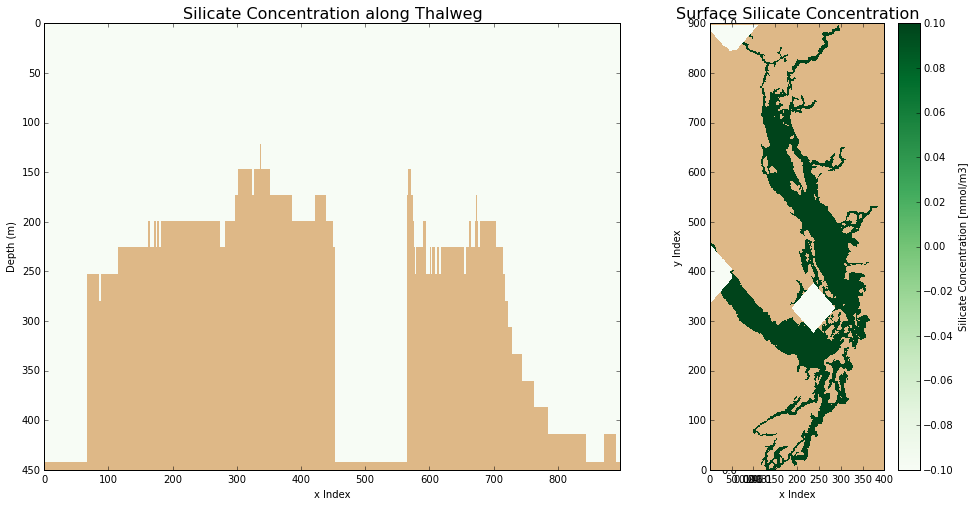

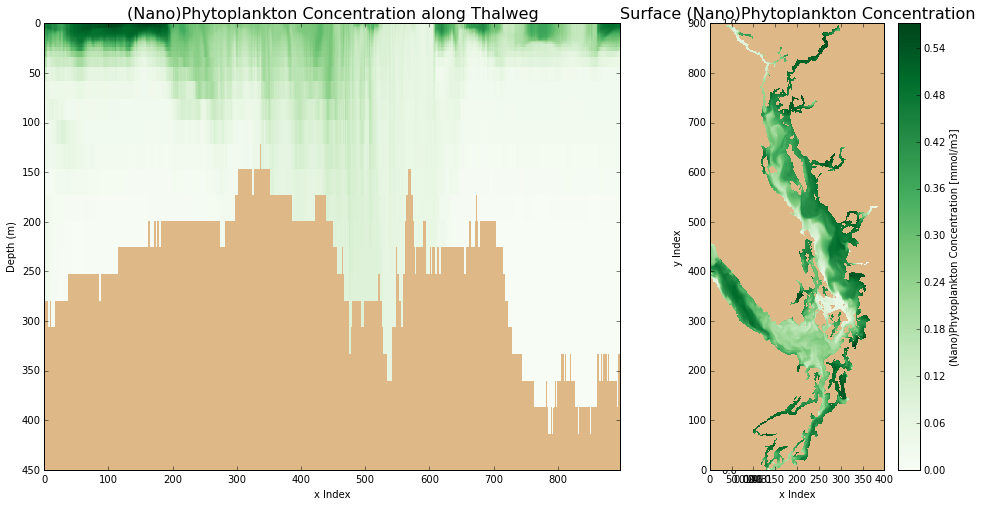

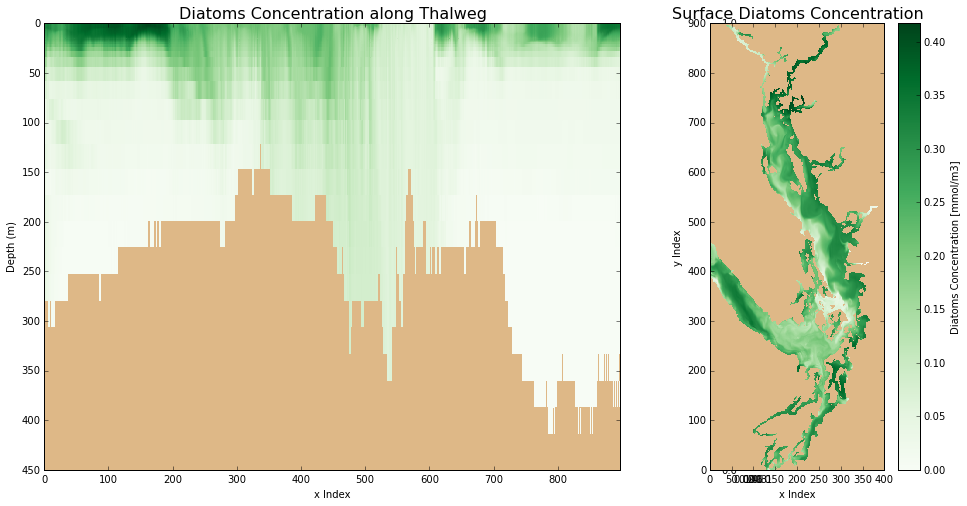

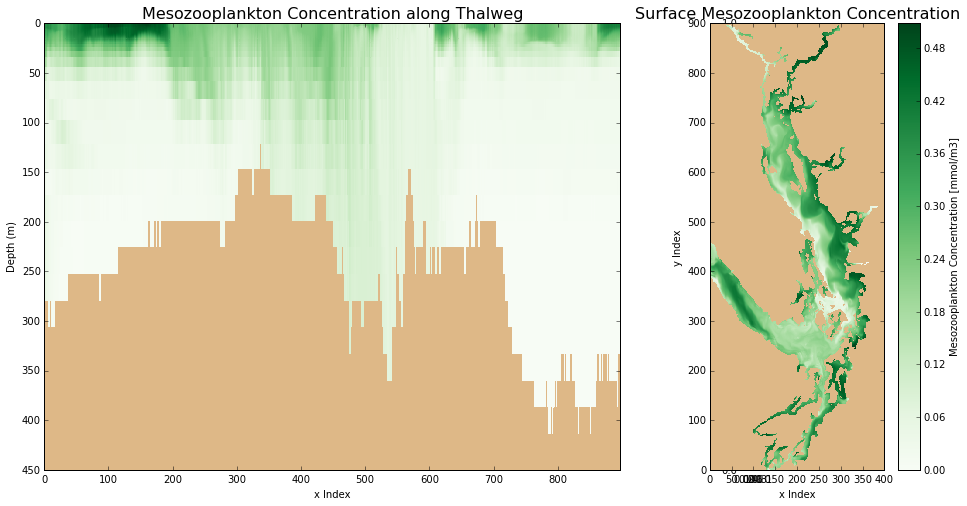

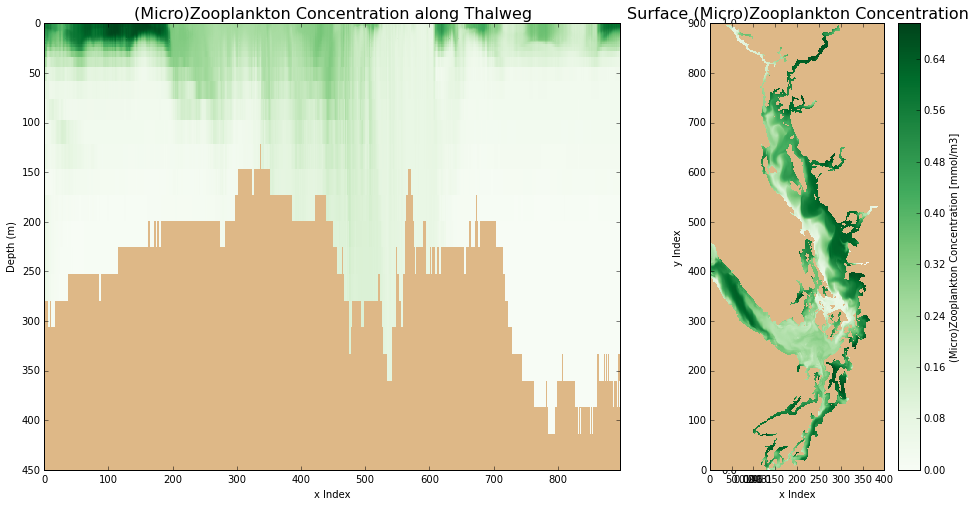

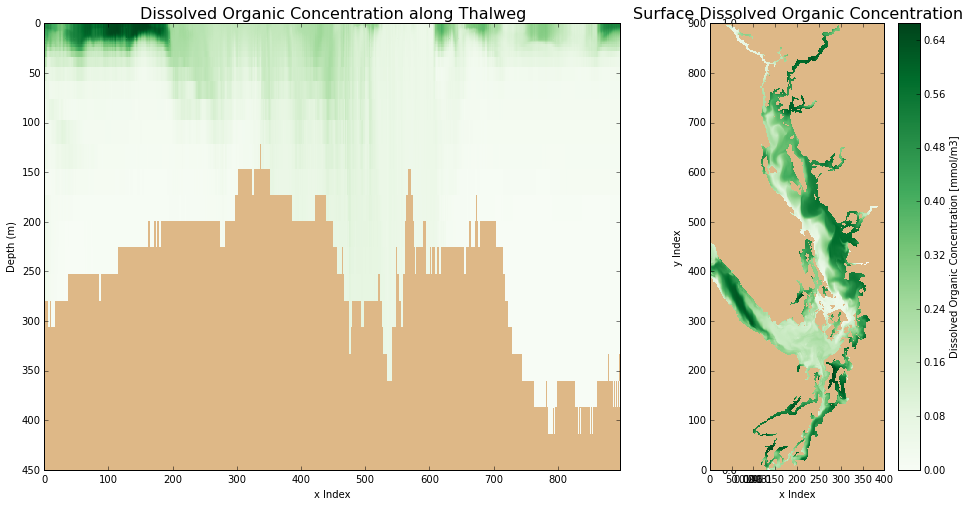

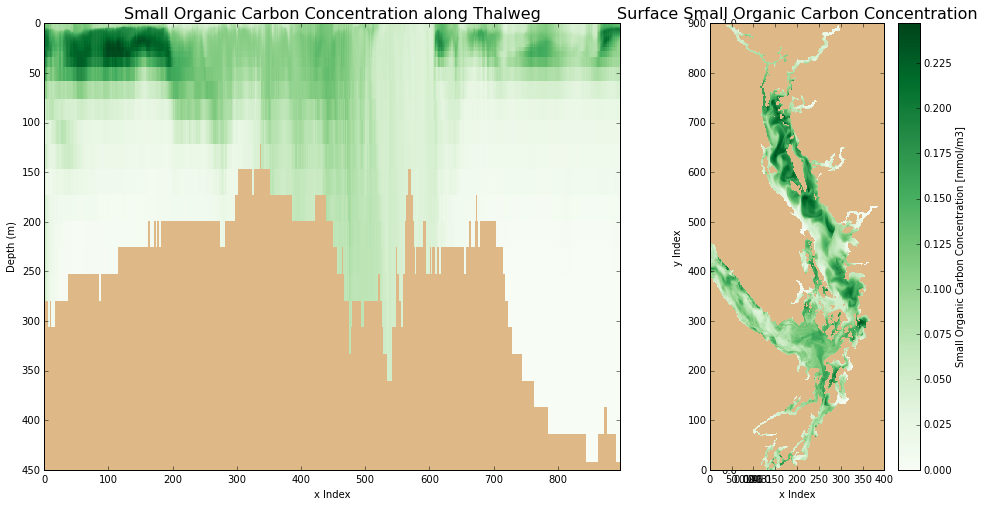

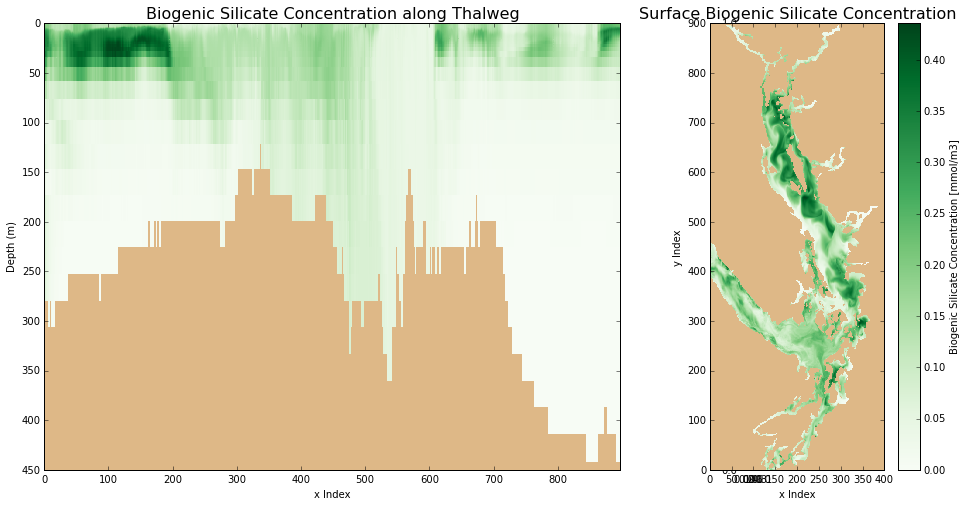

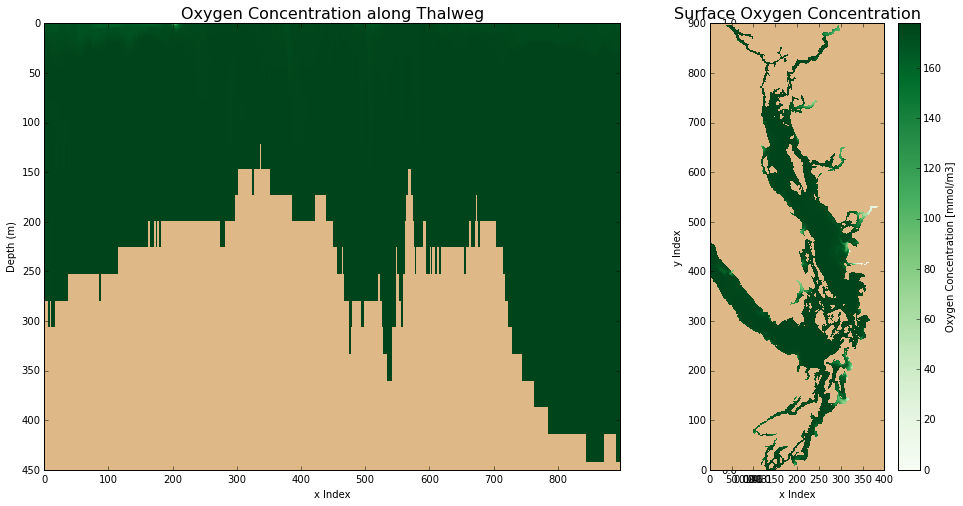

In [7]:
var = ['NO3', 'NH4', 'Si', 'PHY', 'PHY2', 'MYRI', 'MICZ', 'DOC', 'POC', 'bSi', 'O2']
for field in var[:]:
    plot_surface_thalweg(grid_g, thalweg, zlevels, x, z, field, -16)

## Make Depth integrated plots for creatures...

In [7]:
def plot_depth_integrated(field, time, e3t):
    
    conc = grid_g.variables[field]
    conc_ma = np.ma.masked_values(conc[time, :, :, :], 0)
    
    dep_int = conc_ma*e3t[0,:,:,:]
    dep_int_sum = np.sum(dep_int, axis=0)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    
    viz_tools.set_aspect(ax)
    cmap = plt.get_cmap('Greens')
    cmap.set_bad('burlywood')
    
    #Surface plot
    mesh = ax.pcolormesh(dep_int_sum, cmap=cmap)
    cbar = fig.colorbar(mesh)
    #plt.axis(0, conc_ma.shape[1], 0, conc_ma.shape[0])
    ax.set_title('Depth Integrated {label}'.format(label=conc.long_name.title()), fontsize=16)
    ax.set_xlabel('x Index')
    ax.set_ylabel('y Index')
    cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))

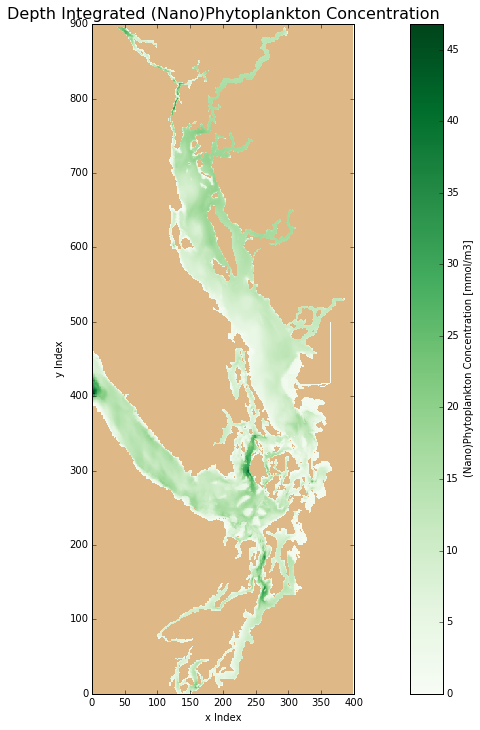

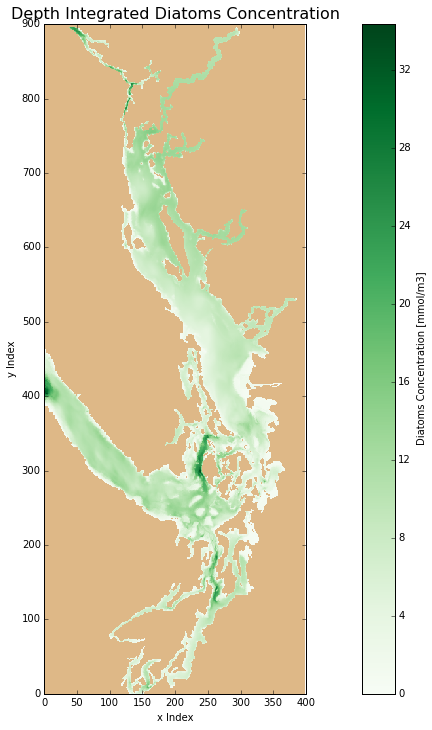

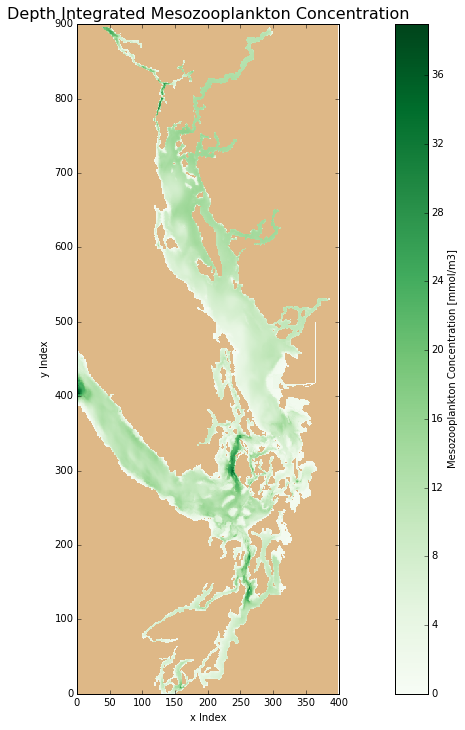

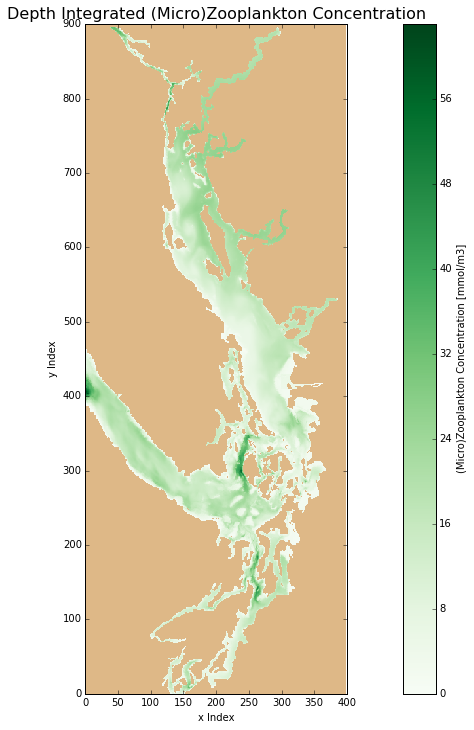

In [8]:
var = ['PHY', 'PHY2', 'MYRI', 'MICZ']

for field in var[:]:
    plot_depth_integrated(field, time, e3t)